# **Welcome to Decision Tree Assignment Quiz**

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, recall_score
from scipy.stats import entropy
from sklearn import tree

In [2]:
# Import the required dataset
df_pokemon = pd.read_csv(r'D:\Intellipaat\Datasets\Pokemon.csv')
df_pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# How many pokemon are from the 5th generation ?
df_pokemon[df_pokemon['Generation'] == 5].shape[0]

165

In [4]:
max_defence = df_pokemon['Defense'].max()
df_pokemon[df_pokemon['Defense'] == max_defence].shape[0]

3

Que. How you will be handling missing values in this dataset:
- a. Fill up the null values with the median.
- b. Fill up the null values with standard deviation.
- c. Fill up the null values with the mean.
- d. Fill up the null values with None.

-> d. Fill up the null values with None

<Axes: >

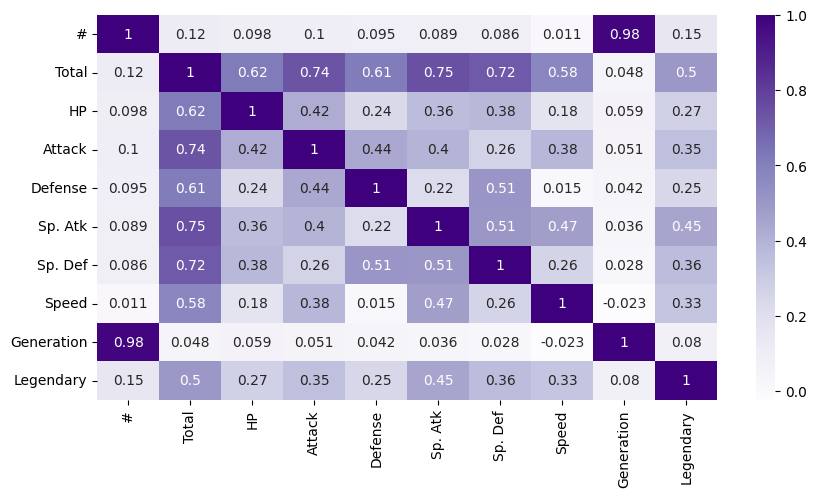

In [5]:
# Which columns are not having any kind of relationship with the generation column
plt.figure(figsize=(10, 5))
sns.heatmap(df_pokemon.corr(numeric_only=True), annot=True, cmap='Purples')

-> c. Both of the above

## Exploratory Data Analysis

In [6]:
# Overview of data
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
# Check for the null values in df
df_pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
# Replace the NaN with None in df
df_pokemon['Type 2'].replace(np.nan, 'None', inplace=True)

In [9]:
# Check for null values in df
df_pokemon.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [10]:
# Check for the duplicates in df
df_pokemon.duplicated().sum()

0

In [11]:
# Remove the un-neccessary column from df
df_pokemon.drop(columns=['Name'], inplace=True)

In [12]:
# Encode the object columns
obj_cols = df_pokemon.select_dtypes('object').columns
obj_cols

Index(['Type 1', 'Type 2'], dtype='object')

In [13]:
df_pokemon = pd.get_dummies(data=df_pokemon, columns=obj_cols)

In [14]:
df_pokemon.columns

Index(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation', 'Legendary', 'Type 1_Bug', 'Type 1_Dark', 'Type 1_Dragon',
       'Type 1_Electric', 'Type 1_Fairy', 'Type 1_Fighting', 'Type 1_Fire',
       'Type 1_Flying', 'Type 1_Ghost', 'Type 1_Grass', 'Type 1_Ground',
       'Type 1_Ice', 'Type 1_Normal', 'Type 1_Poison', 'Type 1_Psychic',
       'Type 1_Rock', 'Type 1_Steel', 'Type 1_Water', 'Type 2_Bug',
       'Type 2_Dark', 'Type 2_Dragon', 'Type 2_Electric', 'Type 2_Fairy',
       'Type 2_Fighting', 'Type 2_Fire', 'Type 2_Flying', 'Type 2_Ghost',
       'Type 2_Grass', 'Type 2_Ground', 'Type 2_Ice', 'Type 2_None',
       'Type 2_Normal', 'Type 2_Poison', 'Type 2_Psychic', 'Type 2_Rock',
       'Type 2_Steel', 'Type 2_Water'],
      dtype='object')

In [15]:
# Replace the False & True by 0 & 1
df_pokemon = df_pokemon.astype(int)

In [16]:
# Check the dtypes of df
df_pokemon.dtypes

#                  int32
Total              int32
HP                 int32
Attack             int32
Defense            int32
Sp. Atk            int32
Sp. Def            int32
Speed              int32
Generation         int32
Legendary          int32
Type 1_Bug         int32
Type 1_Dark        int32
Type 1_Dragon      int32
Type 1_Electric    int32
Type 1_Fairy       int32
Type 1_Fighting    int32
Type 1_Fire        int32
Type 1_Flying      int32
Type 1_Ghost       int32
Type 1_Grass       int32
Type 1_Ground      int32
Type 1_Ice         int32
Type 1_Normal      int32
Type 1_Poison      int32
Type 1_Psychic     int32
Type 1_Rock        int32
Type 1_Steel       int32
Type 1_Water       int32
Type 2_Bug         int32
Type 2_Dark        int32
Type 2_Dragon      int32
Type 2_Electric    int32
Type 2_Fairy       int32
Type 2_Fighting    int32
Type 2_Fire        int32
Type 2_Flying      int32
Type 2_Ghost       int32
Type 2_Grass       int32
Type 2_Ground      int32
Type 2_Ice         int32


In [17]:
df_pokemon

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,405,60,62,63,80,80,60,1,0,...,0,0,0,0,0,1,0,0,0,0
2,3,525,80,82,83,100,100,80,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,625,80,100,123,122,120,80,1,0,...,0,0,0,0,0,1,0,0,0,0
4,4,309,39,52,43,60,50,65,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,600,50,100,150,100,150,50,6,1,...,0,0,0,0,0,0,0,0,0,0
796,719,700,50,160,110,160,110,110,6,1,...,0,0,0,0,0,0,0,0,0,0
797,720,600,80,110,60,150,130,70,6,1,...,0,0,0,0,0,0,0,0,0,0
798,720,680,80,160,60,170,130,80,6,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Create independent & dependent variable
X = df_pokemon.drop(columns=['Legendary'])
y = df_pokemon['Legendary']

In [19]:
# Standardize the input data
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [20]:
# Split the data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
# Display the shape of training & testing data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(560, 46)
(240, 46)
(560,)
(240,)


### Logistic Regression algorithm

In [22]:
# Build & train a logistic regression model 
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [23]:
# Prediction using log-reg model
y_pred = log_reg.predict(X_test)

In [24]:
# Check the accuracy of model
accuracy_score(y_test, y_pred)

0.9208333333333333

### Decision Tree Algorithm

In [25]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Prediction using dt model
y_pred2 = dec_tree.predict(X_test)

In [27]:
# Check the accuracy of model
accuracy_score(y_test, y_pred2)

0.9541666666666667

### Random forest algorithm

In [28]:
ran_for = RandomForestClassifier()
ran_for.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# Prediction using rf model
y_pred3 = ran_for.predict(X_test)

In [30]:
# Check the accuracy of model
accuracy_score(y_test, y_pred3)

0.9416666666666667

Que. Which of the following model is the best fit for predicting the legendary of the
pokemon based on the below parameters:
1. Handle the missing values.
2. Split the dataset into a 70:30 ratio with random_state as 1.
- a. Linear Regression
- b. Logistic Regression
- c. Decision Tree Model
- d. Random Forest Model


In [31]:
# Confusion matrix
confusion_matrix(y_test,y_pred2)

array([[214,   5],
       [  6,  15]], dtype=int64)

In [32]:
# Classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       219
           1       0.75      0.71      0.73        21

    accuracy                           0.95       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.95      0.95      0.95       240



-> c. Decision Tree Model

Que. What is the precision of the Decision Tree model when the target is False?
- a. 0.90 to 0.1
- b. 0.80 to 0.90
- c. 1.0 to 2.0
- d. 0.50 to 0.60

-> a. 0.90 to 0.1

Que. What is the sensitivity of the above model when the target is True?
- a. 0.90 to 1.0
- b. 0.50 to 0.60
- c. 0.60 to 0.70
- d. 0.30 to 0.40

-> c. 0.60 to 0.70

Que. Decision tree models might create some biased trees if some classes
dominate. From the below options which action is best to take so that it
won't create biased trees:
- a. balance the dataset prior to fitting
- b. imbalance the dataset prior to fitting
- c. balance the dataset after fitting
- d. None of the above

-> a. balance the dataset prior to fitting

Que. Suppose, you have to work with an ML problem, where you have to predict
the number of oxygen tanks needed to be shipped from Indonesia. Which
of the following ML algorithm you will choose:
- a. Logistic regression
- b. Decision Tree
- c. Both of the above
- d. None of the above

-> b. Decision tree

Que. Which of the following is true for the Decision Tree?
- a. The model can able to generate understandable rules
- b. The model can able to handle both continuous and categorical variables
- c. It can able to perform classification without requiring much computation
- d. All of the above

-> d. All of the above

Que. The total gain is computed by adding the expected value of each
outcome and deducting the costs associated with the decision.
- a. True
- b. False

-> a. True

Que. How we can avoid the overfitting in Decision Tree
- a. Stopping the Tree Growth
- b. Pruning the Full Grown Tree
- c. Both of above
- d. None of the Above

-> c. Both of the above

END OF POKEMON DATASET QUERY

---

In [33]:
# Import the required dataset
df_diabetes = pd.read_csv(r'D:\Intellipaat\Datasets\Diabetes.csv')
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Que. What is the entropy of the column Blood Pressure post converting the column into categorical column using the conditions <br/>
BP < 80 -> Low Pressure, <br/>
BP >= 80 and BP <= 120 -> Normal, <br/> 
BP > 120 -> High Pressure? <br/>

a. 0.95 <br/>
b. 0.78 <br/>
c. 0.86 <br/>
d. 0.63 <br/>

In [34]:
# Convert the blood pressure according to their type i.e., low, normal, high
for i in range(len(df_diabetes)):
    if df_diabetes.loc[i, 'BloodPressure'] < 80:
        df_diabetes.loc[i, 'BloodPressure'] = 'Low Pressure'
    elif (df_diabetes.loc[i, 'BloodPressure'] >= 80) & (df_diabetes.loc[i, 'BloodPressure'] <= 120):
        df_diabetes.loc[i, 'BloodPressure'] = 'Normal'
    else:
        df_diabetes.loc[i, 'BloodPressure'] = 'High Pressure'

In [35]:
df_diabetes['BloodPressure'].value_counts()

BloodPressure
Low Pressure     563
Normal           204
High Pressure      1
Name: count, dtype: int64

In [36]:
# Required to find entropy
print(563 / 768)
print(204 / 768)
print(1 / 768)

0.7330729166666666
0.265625
0.0013020833333333333


In [37]:
# entropy
entropy([0.7330729166666666, 0.265625, 0.0013020833333333333], base=2)

0.8488937951699136

<Axes: xlabel='Pregnancies', ylabel='count'>

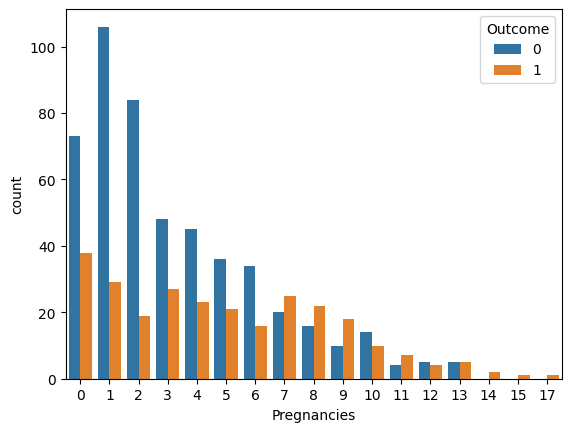

In [38]:
# Visual of pregnancy data (grouped)
pregnancy_data=df_diabetes.groupby(['Pregnancies','Outcome'])['Outcome'].count().reset_index(name="count") 
sns.barplot(data=pregnancy_data,x='Pregnancies',y='count',hue='Outcome')

In [39]:
df_diabetes['DiabetesPedigreeFunction'].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: count, Length: 517, dtype: int64

In [40]:
# convert string to int
df_diabetes = pd.get_dummies(df_diabetes, columns=['BloodPressure'])

In [41]:
# also change their dtype
df_diabetes = df_diabetes.astype(int)
df_diabetes

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BloodPressure_High Pressure,BloodPressure_Low Pressure,BloodPressure_Normal
0,6,148,35,0,33,0,50,1,0,1,0
1,1,85,29,0,26,0,31,0,0,1,0
2,8,183,0,0,23,0,32,1,0,1,0
3,1,89,23,94,28,0,21,0,0,1,0
4,0,137,35,168,43,2,33,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,48,180,32,0,63,0,0,1,0
764,2,122,27,0,36,0,27,0,0,1,0
765,5,121,23,112,26,0,30,0,0,1,0
766,1,126,0,0,30,0,47,1,0,1,0


In [42]:
# Initialize independent & dependent variable
X = df_diabetes[['Insulin', 'BMI']]
y = df_diabetes['Outcome']

In [43]:
# Classify the data into training & testing using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [44]:
# normalize the range using scaler
X = scaler.fit_transform(X)

In [45]:
X = pd.DataFrame(X, columns=['Insulin', 'BMI'])

In [46]:
# model building
dec_tree = DecisionTreeClassifier(random_state=30)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=30)

In [47]:
# Prediction using model
y_pred = dec_tree.predict(X_test)

In [48]:
# Accuracy of model
accuracy_score(y_test, y_pred)

0.6363636363636364

In [49]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[75, 23],
       [33, 23]], dtype=int64)

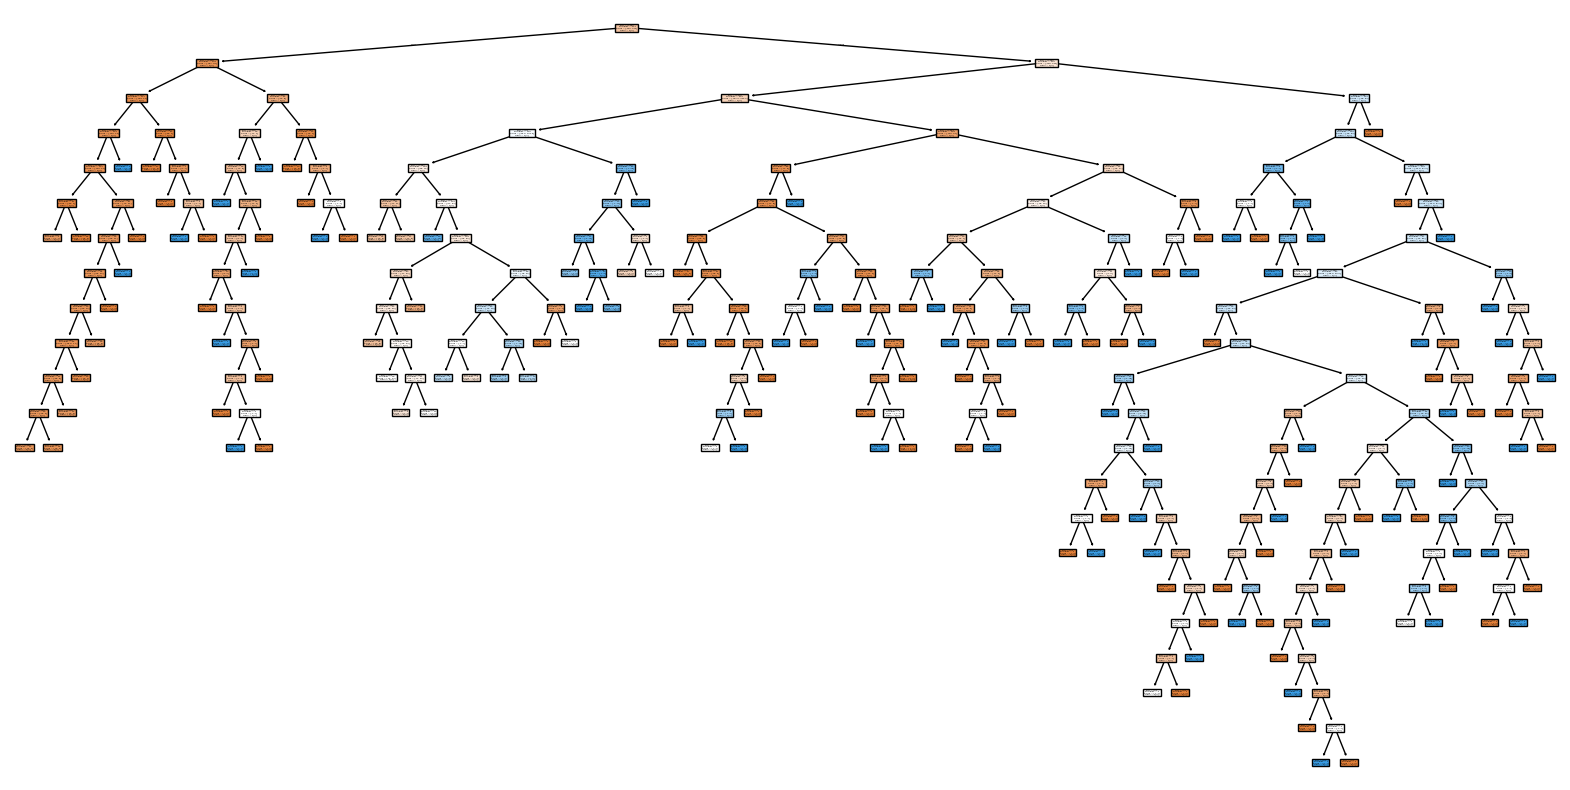

In [50]:
# Plot the tree of model
plt.figure(figsize=(20, 10))
tree.plot_tree(dec_tree, feature_names=X.columns, filled=True, class_names=True)
plt.show()

END

---